##
Objective: To analyse insights and trends from the Kaggle Data Science Survey from 2017 to 2021

I break down the areas of investigation into 3 sections
- Technical Knowledge (eg programming)
- Domanin knowledge (Eg Linear Regression)
- Miscelleanous

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
import itertools
import collections
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import os

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/SkillsFuture Case/')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('data/kaggle_survey_2017_2021.csv', header=1)


<ipython-input-54-e6193f4c2f3d>:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,272,273,274,276,277,278,279,280,2

In [55]:
df.head(10)

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,1020.0,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,NaN
6,2021,141.0,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021,484.0,30-34,Man,India,Bachelorâ€™s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021,1744.0,22-24,Man,Russia,Bachelorâ€™s degree,Currently not employed,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021,655.0,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
len(df)

106301

In [57]:
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'] = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace({
    "Bachelorâ€™s degree": "Bachelor's degree",
    "Masterâ€™s degree": "Master's degree"
})

In [72]:
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'] = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace({
    "Some college/university study without earning a bachelorâ€™s degree": "Some college/university study without earning a bachelor's degree"
})

In [45]:
df.head(5)

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelor's degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Master's degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924.0,22-24,Man,Pakistan,Master's degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
sg_df = df[df['In which country do you currently reside?'] == 'Singapore']

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barchart_multiple_questions(df, year_col, columns, plot_title):

    counts = df.groupby([year_col])[columns].count()

    sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})

    ax = counts.plot(kind='bar', stacked=True, colormap='tab20', rot=0)

    plt.title(plot_title)
    plt.xlabel('Year')
    plt.ylabel('Count')

    ax.legend_.set_title(None)
    ax.legend(labels=[col.split(' - ')[-1] for col in columns])

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()



def plot_barchart_single_question(df, year_col, column, plot_title):

    # Get the count of each answer per year
    counts = df.groupby([year_col])[column].value_counts().unstack(fill_value=0)

    sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})

    ax = counts.plot(kind='bar', stacked=True, colormap='tab20', rot=0)

    plt.title(plot_title)
    plt.xlabel('Year')
    plt.ylabel('Count')

    ax.legend_.set_title(None)
    ax.legend(labels=counts.columns)

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()





## Technical Knowledge

1. Investigating the usage of each programming language on a regular basis
- Insight: Python remains the predominantly used language,followed by R and SQL, even from 2017 - 2021
- This trend is observed both globally and in the SG context.
- Thus, SkillsFuture programmes should be geared towards these languages and their effective usage

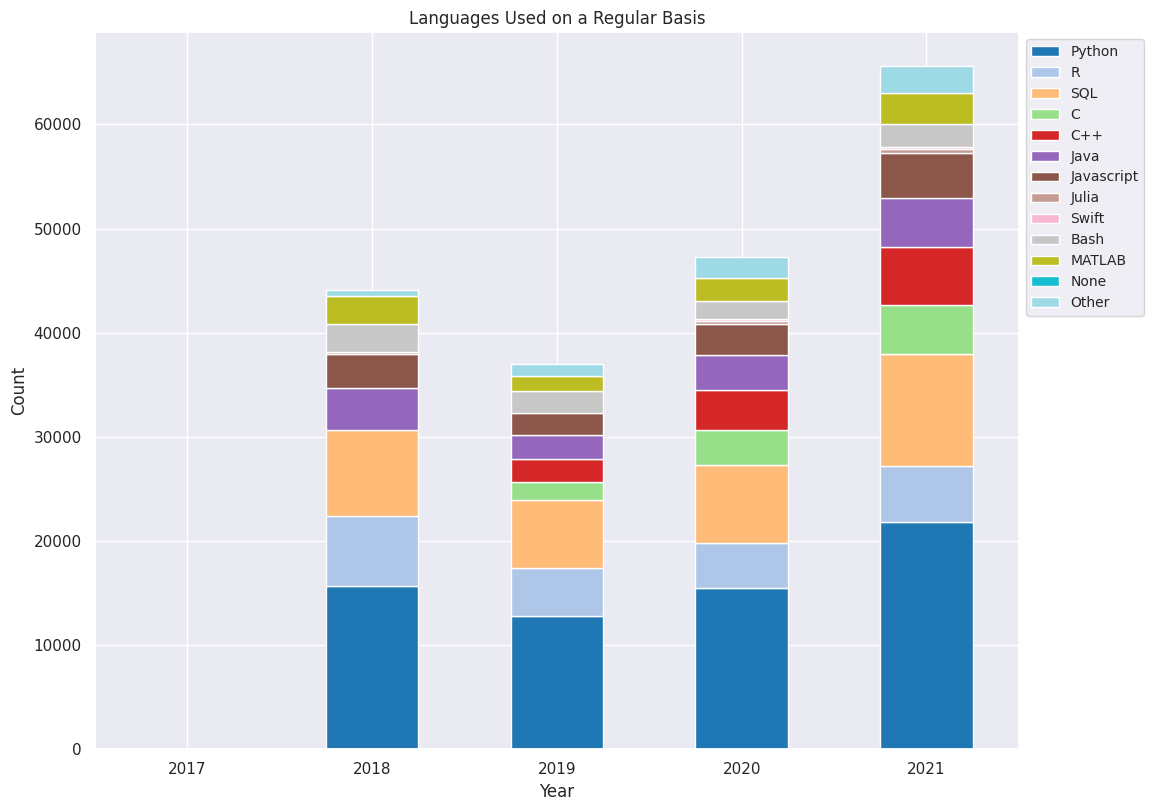

In [61]:
# List of columns for programming languages
language_columns = [
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other"
]


plot_barchart_multiple_questions(df, 'Year', language_columns, plot_title='Languages Used on a Regular Basis')


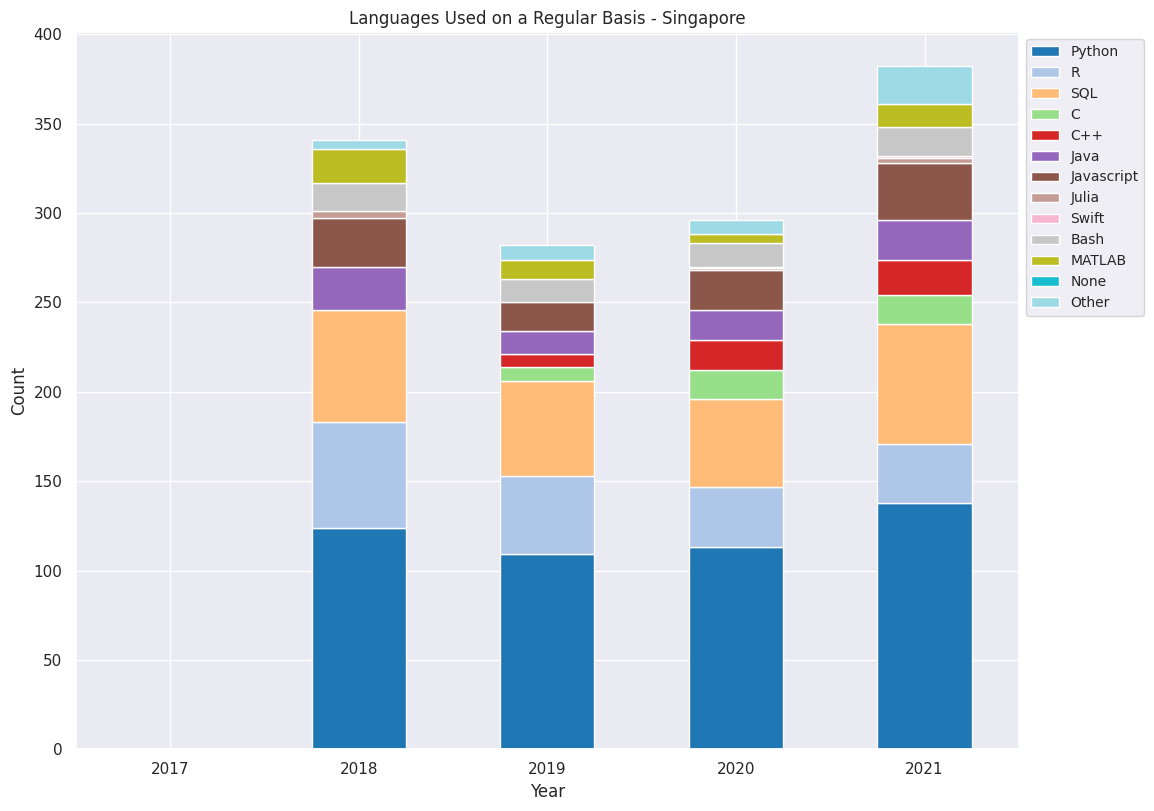

In [62]:
plot_barchart_multiple_questions(sg_df, 'Year', language_columns, plot_title='Languages Used on a Regular Basis - Singapore')


2. Investigating the usage of each cloud computing platform on a regular basis
- Insight: We might only regard data from 2018 onwards, considering that there was a massive drop off in responses to this question in 2017
- The results however, even if we do include 2017 onwards, shows that AWS, Azure and GCP are the 3 most used cloud platforms for Data Scientiests
- Considering that these enterprise level tools are used regularly in the field and it is difficult for an individual to gain access to these tools without a subscription, SkillsFutureSG can consider offering courses to teach these tools that come with student APIs, for individuals to gain some hands on experience with these tools


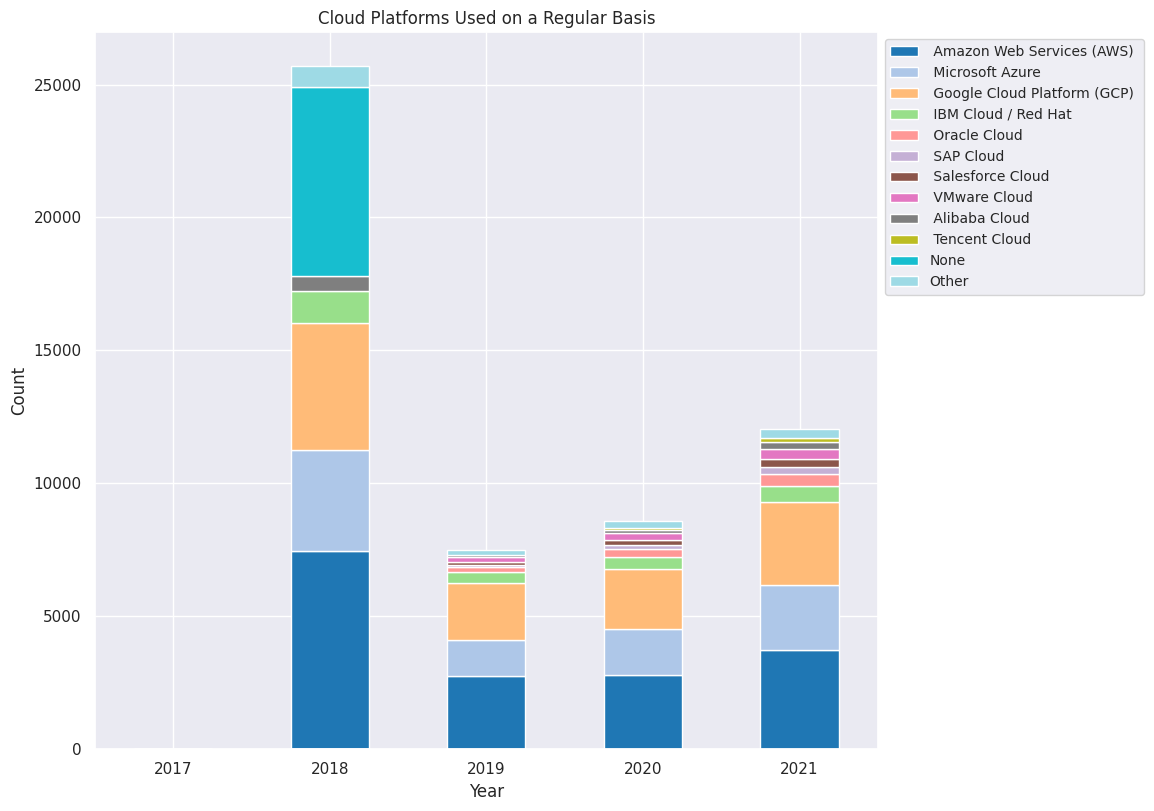

In [63]:

cloud_columns = ["Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) ",
                  "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Oracle Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  SAP Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Salesforce Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  VMware Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Alibaba Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - None",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other"]

plot_barchart_multiple_questions(df, 'Year', cloud_columns, plot_title='Cloud Platforms Used on a Regular Basis')


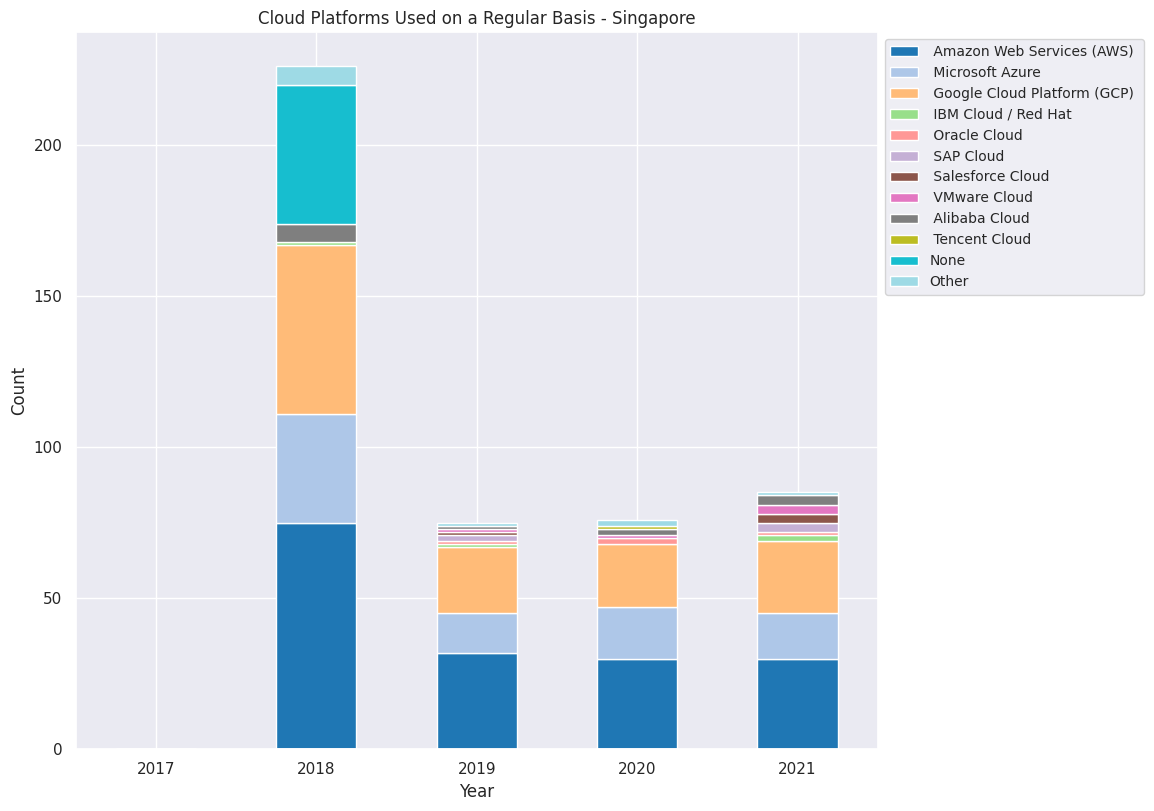

In [64]:
plot_barchart_multiple_questions(sg_df, 'Year', cloud_columns, plot_title='Cloud Platforms Used on a Regular Basis - Singapore')


## Domain Knowledge

1. Investigating the usage of ML Algorithms on a regular basis
SkillsFuture can consider implementing more courses relating to the following knowledge areas: Linear / Logistic Regression, Decision Trees, GBMs

In [66]:
ml_questions_columns = [
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Gradient Boosting Machines (xgboost, lightgbm, etc)",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Bayesian Approaches",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Evolutionary Approaches",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Dense Neural Networks (MLPs, etc)",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Convolutional Neural Networks",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Generative Adversarial Networks",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Recurrent Neural Networks",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-3, etc)",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - None",
    "Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other"
]


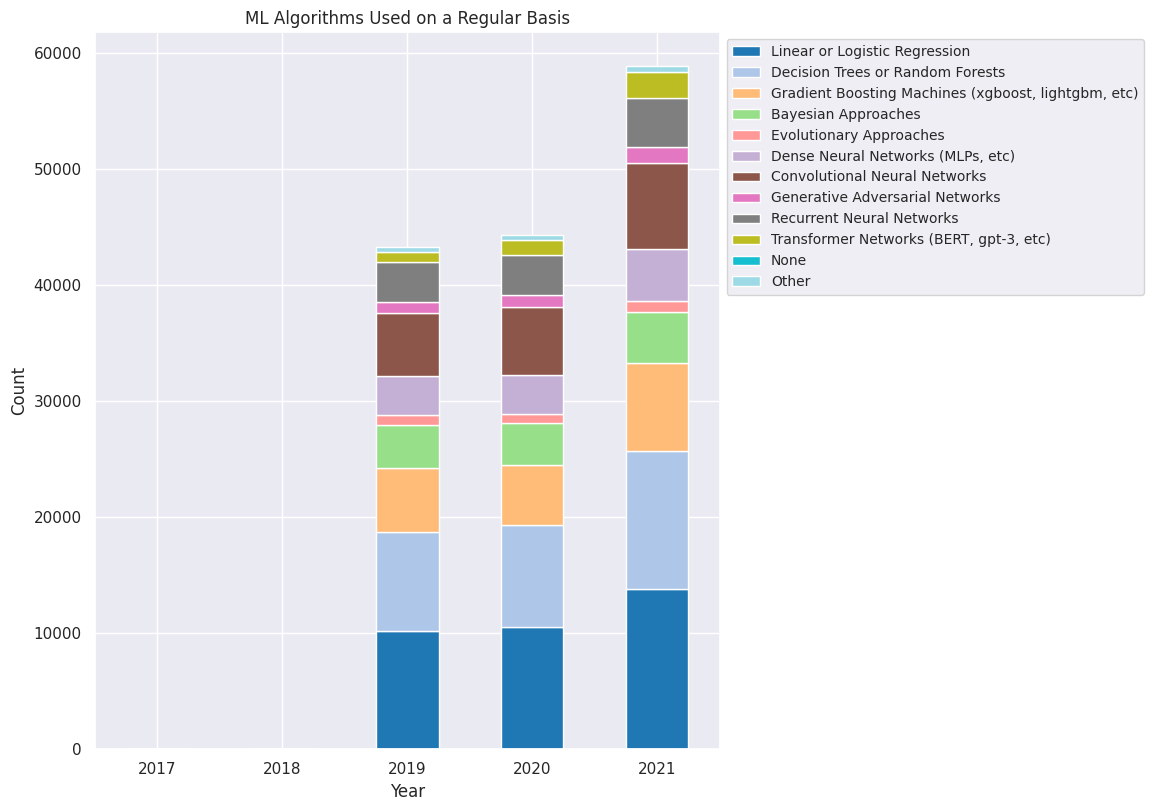

In [16]:
plot_barchart_multiple_questions(df, 'Year', ml_questions_columns, plot_title='ML Algorithms Used on a Regular Basis')


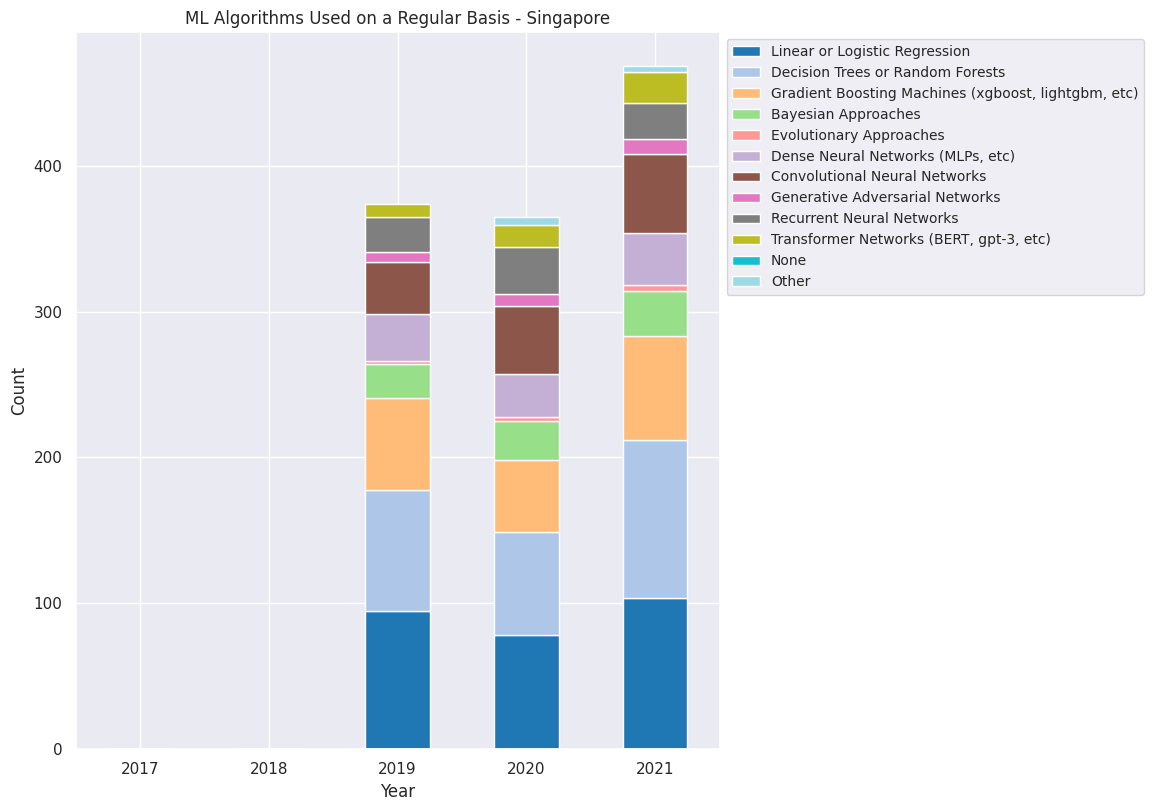

In [67]:
plot_barchart_multiple_questions(sg_df, 'Year', ml_questions_columns, plot_title='ML Algorithms Used on a Regular Basis - Singapore')


2. Investigating the usage of NLP methods on a regular basis
Given the rise of LLMs and language models in general, it might make sense for SkillsFuture to look into the trends in NLP methods

In [68]:
nlp_questions = [
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Encoder-decorder models (seq2seq, vanilla transformers)",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"
]


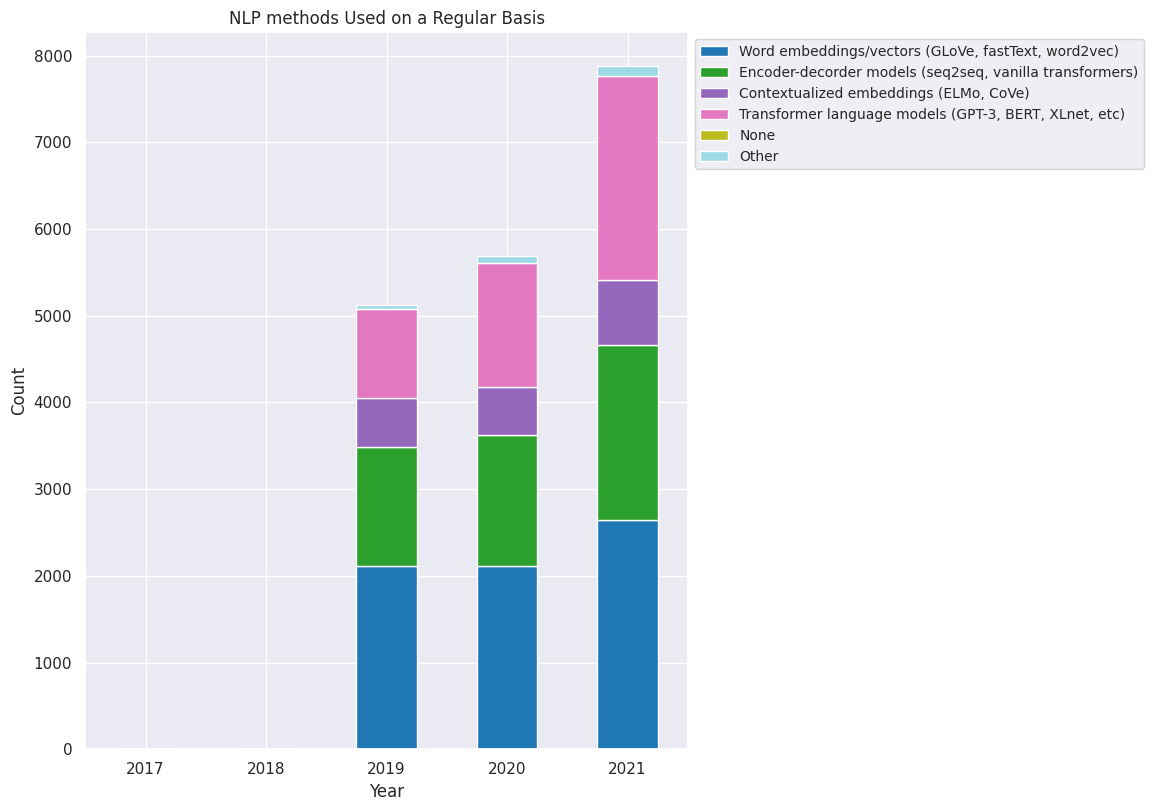

In [38]:
plot_barchart_multiple_questions(df, 'Year', nlp_questions, plot_title='NLP methods Used on a Regular Basis')

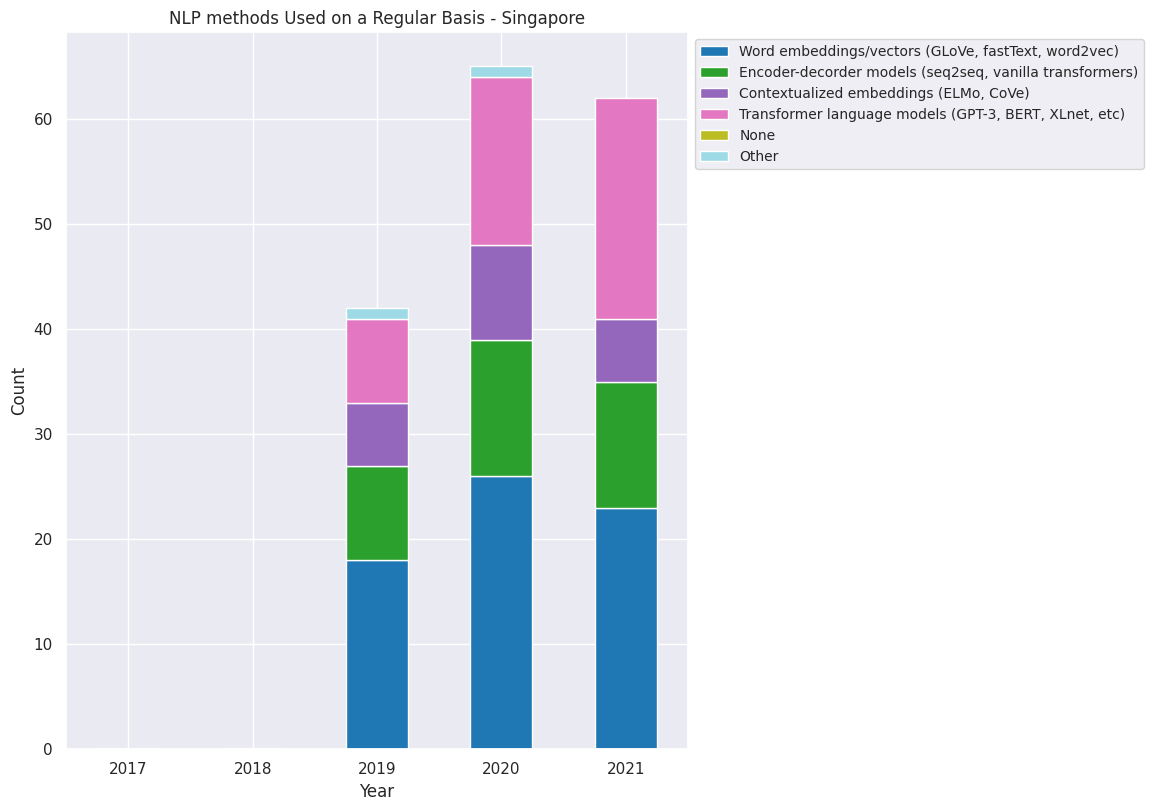

In [69]:
plot_barchart_multiple_questions(sg_df, 'Year', nlp_questions, plot_title='NLP methods Used on a Regular Basis - Singapore')

In [14]:
csv_output = df.head(1)
csv_output.to_csv('output.csv', index=False)

Misc Info

- YoE
- Formal Education

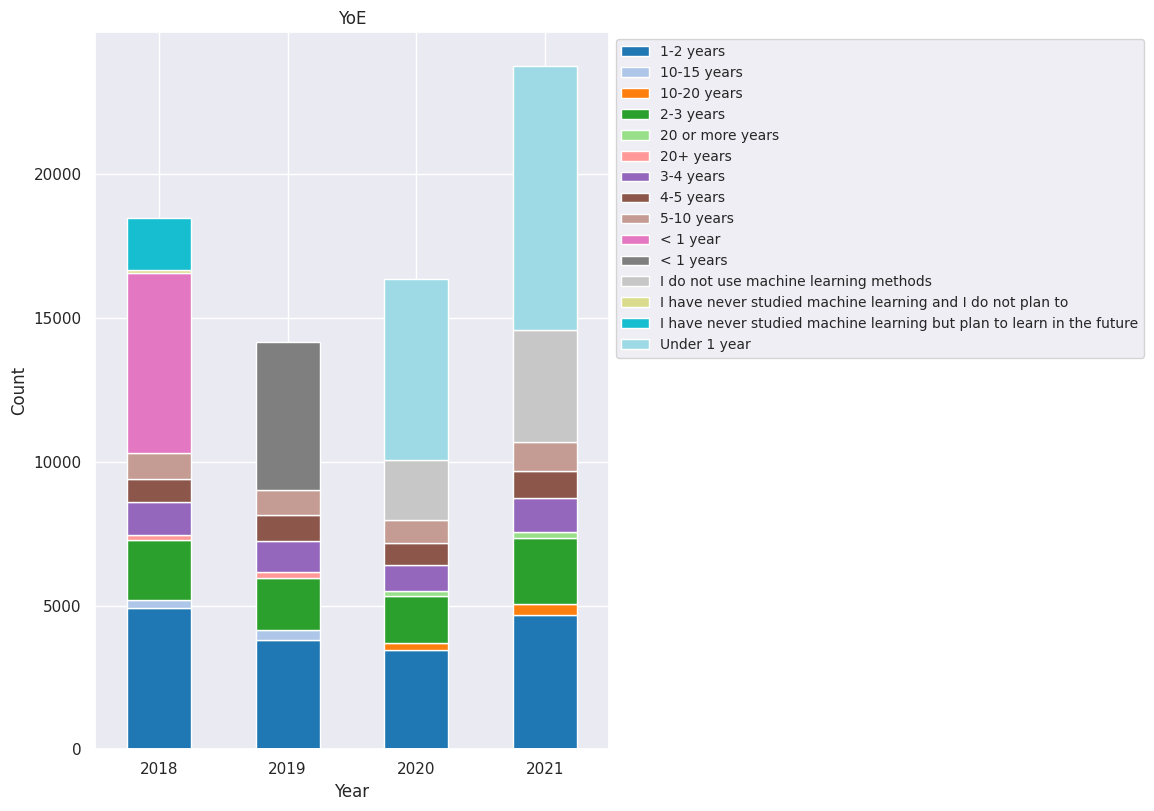

In [49]:
plot_barchart_single_question(df, 'Year', 'For how many years have you used machine learning methods?', 'YoE')

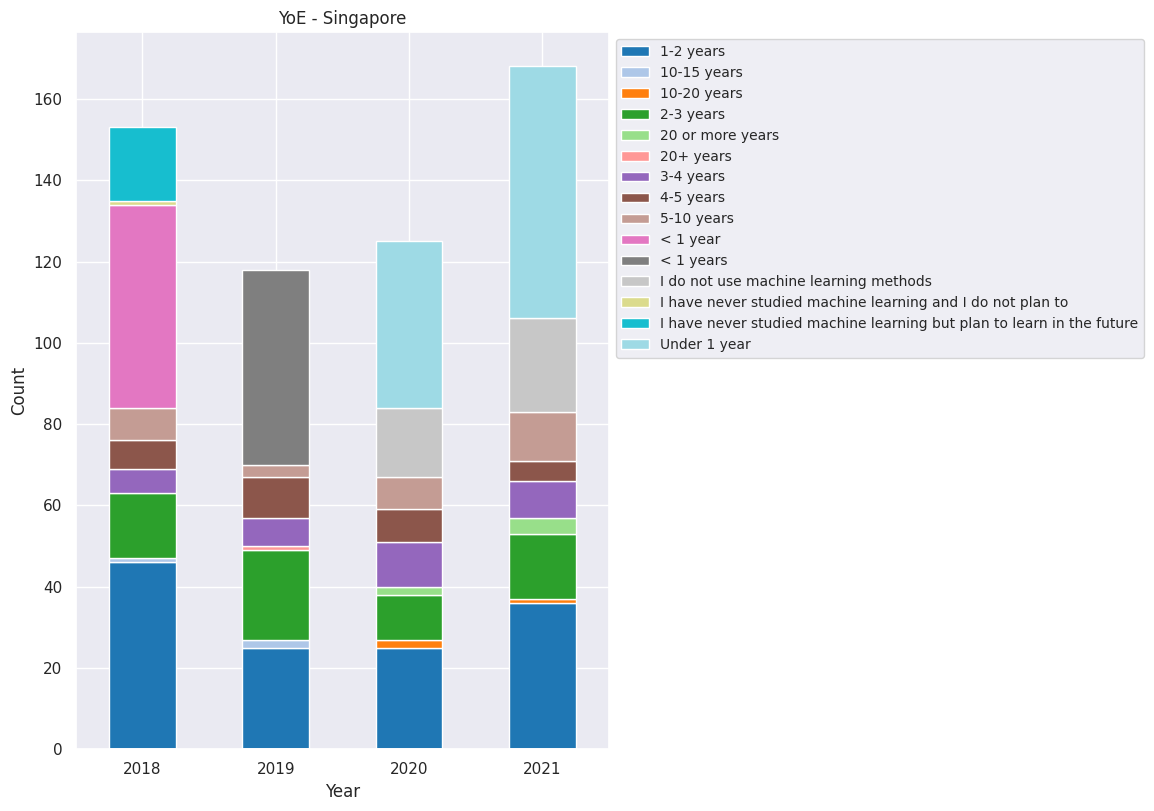

In [70]:
plot_barchart_single_question(sg_df, 'Year', 'For how many years have you used machine learning methods?', 'YoE - Singapore')

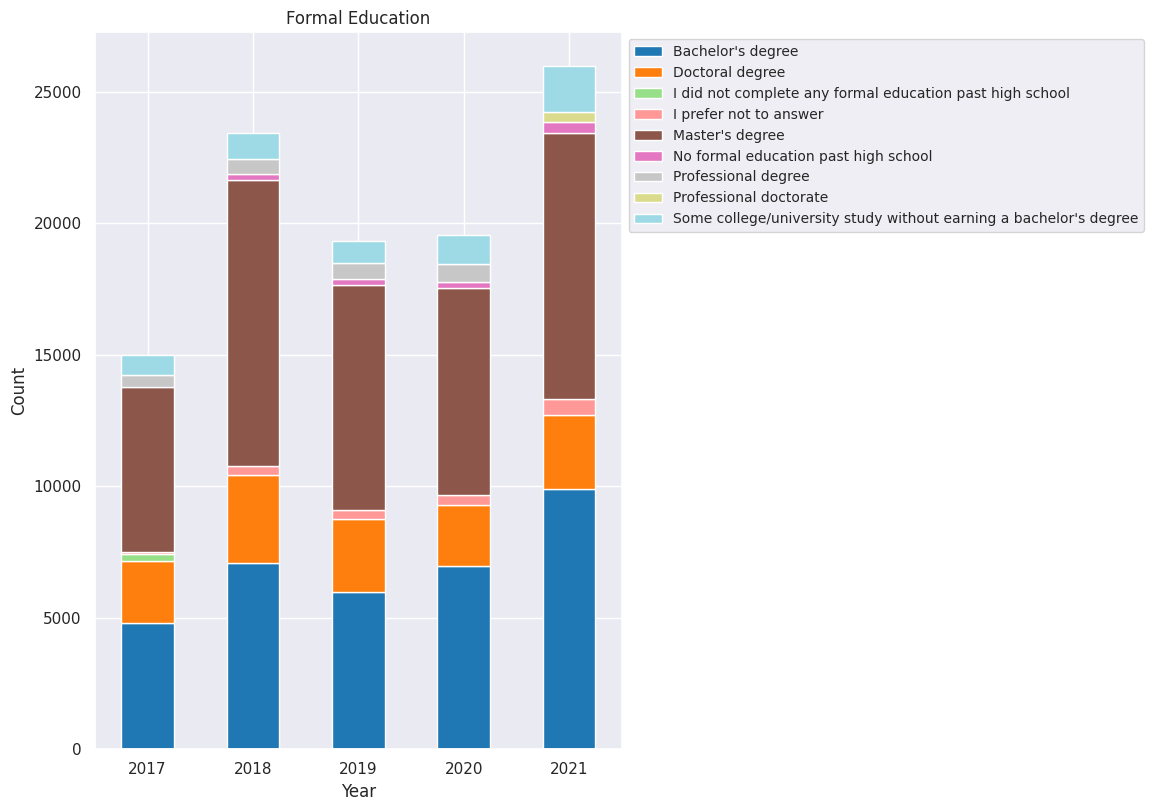

In [73]:
plot_barchart_single_question(df, 'Year', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Formal Education')

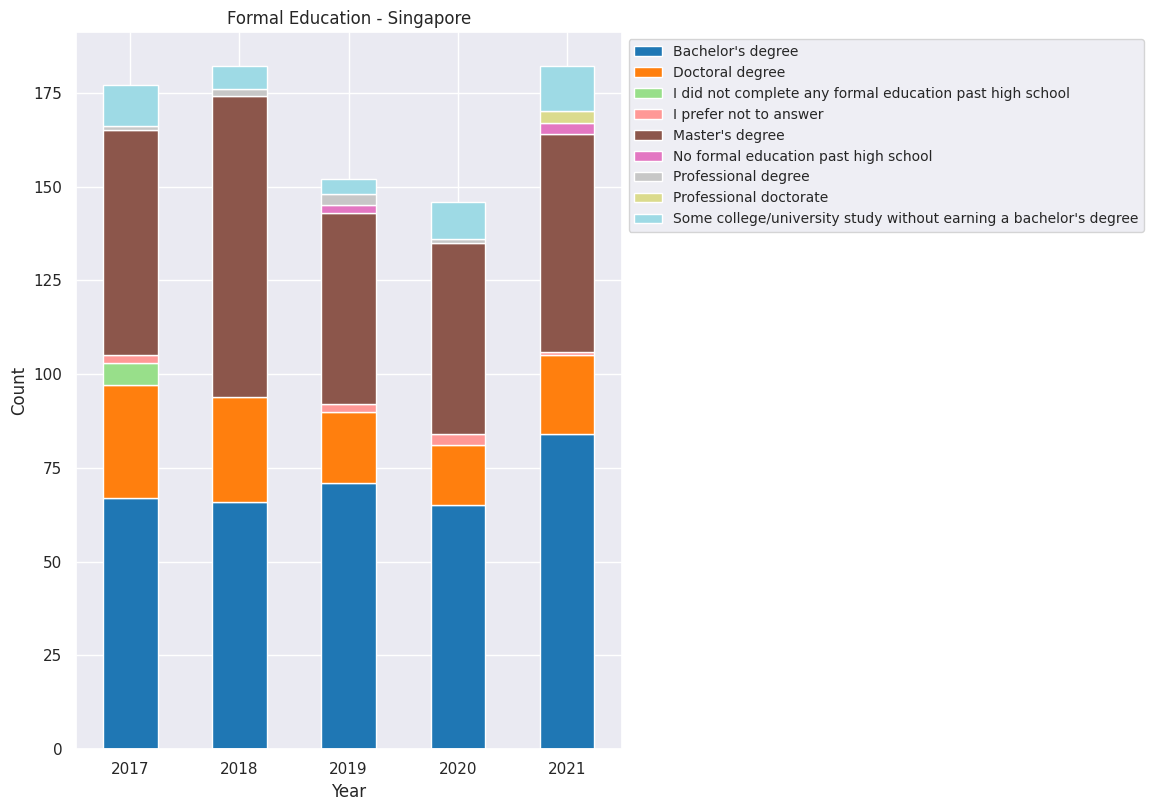

In [76]:
plot_barchart_single_question(sg_df, 'Year', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Formal Education - Singapore')